### Importing libraries

In [1]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import time  # to measure how long the models take
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets, linear_model, metrics
from sklearn.tree import plot_tree

In [2]:
df_train = pd.read_csv("https://raw.githubusercontent.com/supragyabajpai/SchulichJourney_DataScience/main/Data%20Science%202/train.csv",sep =";")
df_test = pd.read_csv("https://raw.githubusercontent.com/supragyabajpai/SchulichJourney_DataScience/main/Data%20Science%202/test.csv",sep =";")

### Data overview

#### We will look at the training data first.

In [3]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df_train.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


##### I will check the distribution of values in our data 

In [6]:
for i in df_train.columns:
    print("Column Name:", i)
    print(df_train[i].unique())
    print("------------------------------")


Column Name: age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
------------------------------
Column Name: job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
------------------------------
Column Name: marital
['married' 'single' 'divorced']
------------------------------
Column Name: education
['tertiary' 'secondary' 'unknown' 'primary']
------------------------------
Column Name: default
['no' 'yes']
------------------------------
Column Name: balance
[ 2143    29     2 ...  8205 14204 16353]
------------------------------
Column Name: housing
['yes' 'no']
------------------------------
Column Name: loan
['no' 'yes']
------------------------------
Column Name: contact
['unknown' 'cellular' 'telep

##### Lets see if we have any null values

In [7]:
df_train.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
# Name of the columns in our dataframe:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### Data Preprocessing

In [9]:
def preprocessing (df):

    df['index'] = df.index + 1
    
    bool_columns =['default','housing','loan','y']

    for i in bool_columns:
        df_train[i] = df_train[i].apply(lambda x: 1 if x == 'yes' else 0)

    df['has_both_loan'] = df.apply(lambda row: 1  if row['housing'] and row['loan'] else 0, axis=1)

    df['duration']= df['duration']/60

- Creating a new column with consecutive numbers starting from 1 as an identifier for each row.

- Converting the following columns: "'default,' 'housing,' 'loan,' 'y,'" from binary categorical data into numerical form.

- Converting the duration value from seconds to minutes.

In [10]:
preprocessing(df_train) 

### Data Cleaning/Imputation

####    After taking a overview of data we found that four columns have value called "unkown".
    1. Poutcome
    2. Contact
    3. Education
    4. Job

In [11]:
def calculating_jobs(df):
    
    print('The % of unknown in job is', 100 * len(df[df['job']=='unknown']) / df.shape[0])
    print('The % of unknown in education is', 100 * len(df[df['education']=='unknown']) / df.shape[0])
    print('The % of unknown in poutcome is', 100 * len(df[df['poutcome']=='unknown']) / df.shape[0])
    print('The % of unknown in contact is', 100 * len(df[df['contact']=='unknown']) / df.shape[0])
    print("--------------------------------------------------------------------------------------------------")


In [12]:
def handling_jobs(df):

    print("Lets count the occurrences of each education level among clients whose job is marked as unknown in the DataFrame. It provides insight into the educational background of clients with unknown job information.")
    print("--------------------------------------------------------------------------------------------------")
    print(df[df['job']=='unknown']['education'].value_counts())
    print("--------------------------------------------------------------------------------------------------")
    count_unknown_rows = len(df[(df['job'] == 'unknown') & (df['education'] == 'unknown')])
    print("Number of rows where both 'job' and 'education' are 'unknown':", count_unknown_rows)
    print("--------------------------------------------------------------------------------------------------")
    df.drop(df[(df['job'] == 'unknown') & (df['education'] == 'unknown')].index, inplace=True)
    print("We have dropped these many values from dataframe: ",count_unknown_rows)
    

In [13]:
calculating_jobs(df_train)
handling_jobs(df_train)

The % of unknown in job is 0.6370131162770122
The % of unknown in education is 4.1074074893278185
The % of unknown in poutcome is 81.74780473778505
The % of unknown in contact is 28.798301298356595
--------------------------------------------------------------------------------------------------
Lets count the occurrences of each education level among clients whose job is marked as unknown in the DataFrame. It provides insight into the educational background of clients with unknown job information.
--------------------------------------------------------------------------------------------------
education
unknown      127
secondary     71
primary       51
tertiary      39
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------
Number of rows where both 'job' and 'education' are 'unknown': 127
--------------------------------------------------------------------------------------------------
We have dropped these many v

In [14]:
def calculating_job (df):
    education_levels = ['primary', 'secondary', 'tertiary']

    for edu_level in education_levels:
        mode_jobs = df[df['education'] == edu_level]['job'].value_counts(normalize=True).nlargest(5)
        print(f'{edu_level.capitalize()} education JOB modes are:')
        print(mode_jobs)
        print("---------------------------------")


In [15]:
def handling_job(df,values):
   
    df['job'] = np.where((df['job'] == 'unknown') & (df['education'] == 'primary'), 'blue-collar', df['job'])
    df['job'] = np.where((df['job'] == 'unknown') & (df['education'] == 'tertiary'), 'management', df['job'])

    sec_jobs = values

    condition = (df['job'] == 'unknown') & (df['education'] == 'secondary')

    random_jobs = np.random.choice(sec_jobs, size=np.sum(condition), replace=True)
    df.loc[condition, 'job'] = random_jobs
    print(df['job'].unique())


In [16]:
calculating_job(df_train)

Primary education JOB modes are:
job
blue-collar    0.548533
retired        0.116041
housemaid      0.091519
services       0.050358
management     0.042913
Name: proportion, dtype: float64
---------------------------------
Secondary education JOB modes are:
job
blue-collar    0.231489
technician     0.225369
admin.         0.181838
services       0.148996
management     0.048315
Name: proportion, dtype: float64
---------------------------------
Tertiary education JOB modes are:
job
management       0.586497
technician       0.147959
self-employed    0.062627
entrepreneur     0.051575
admin.           0.043004
Name: proportion, dtype: float64
---------------------------------


In [17]:
values = ['blue-collar', 'technician', 'admin.','services']
handling_job(df_train,values)

['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']


In [18]:
def calculating_education(df):
    print("Jobs that possess an education category with an unknown value: ",df[df['education']=='unknown']['job'].value_counts())
    print("-----------------------------------------------------------------------------")
    for job_category in df['job'].unique():
        mode_education = df[df['job'] == job_category]['education'].value_counts(normalize=True).nlargest(4)
        print(f'"{job_category}" education modes are:')
        print(mode_education)
        print("------------------------------------")

In [19]:
def handling_education(df,value):
        
        job_to_education = value
        df['education'] = df.apply(lambda row: job_to_education.get(row['job'], row['education']),axis=1)
        print(df['education'].unique())

In [20]:
calculating_education(df_train)

Jobs that possess an education category with an unknown value:  job
blue-collar      454
technician       242
management       242
admin.           171
student          163
services         150
retired          119
entrepreneur      76
housemaid         45
self-employed     39
unemployed        29
Name: count, dtype: int64
-----------------------------------------------------------------------------
"management" education modes are:
education
tertiary     0.825524
secondary    0.118037
primary      0.030957
unknown      0.025482
Name: proportion, dtype: float64
------------------------------------
"technician" education modes are:
education
secondary    0.688871
tertiary     0.258573
unknown      0.031796
primary      0.020759
Name: proportion, dtype: float64
------------------------------------
"entrepreneur" education modes are:
education
tertiary     0.461332
secondary    0.364492
primary      0.123067
unknown      0.051110
Name: proportion, dtype: float64
--------------------------

In [21]:
value = {
        'blue-collar': 'secondary',
        'technician': 'secondary',
        'admin.': 'secondary',
        'student': 'secondary',
        'retired': 'secondary',
        'services': 'secondary',
        'unemployed': 'secondary',
        'management': 'tertiary',
        'entrepreneur': 'tertiary',
        'self-employed': 'tertiary',
        'housemaid': 'primary'
            }

handling_education(df_train,value)


['tertiary' 'secondary' 'primary']


We will consider "unknown" within the contact column as a distinct third category, which can be assumed to encompass methods such as email, letter, in-person, and so forth.

For Poutcome, I'm proceeding with two approaches for "Poutcome," and I will ultimately choose the one that yields the best results.

In [22]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'index', 'has_both_loan'],
      dtype='object')

In [23]:
def handling_poutcome(df):
    
    df.drop(['poutcome'], inplace=True, axis=1)
    
    return df

In [24]:
df_train = handling_poutcome(df_train)

### EDA

#### Creating Bins 
We will create certain bins for the purpose of conducting EDA.

In [25]:
# Age Bins:

def create_age_bins(x):
    if x >= 18 and x <= 30:
        return '18-30'
    elif x >= 31 and x <= 40:
        return '31-40'
    elif x >= 41 and x <= 50:
        return '41-50'
    elif x >= 51 and x <= 60:
        return '51-60'
    elif x >= 61 and x <= 70:
        return '61-70'
    elif x >= 71 and x <= 80:
        return '71-80'
    elif x >= 81 and x <= 90:
        return '81-90'
    elif x >= 91 and x <= 95:
        return '91-95'
    else:
        return 'Unknown'

In [26]:
# Duration bins:

def create_duration_bins(x):
    if x < 1:
        return '<1'
    elif x >= 1 and x < 2:
        return '1/2'
    elif x >= 2 and x < 3:
        return '2/3'
    elif x >= 3 and x < 4:
        return '3/4'
    elif x >= 4 and x < 5:
        return '4/5'
    elif x >= 5 and x < 6:
        return '5/6'
    elif x >= 6 and x < 7:
        return '6/7'
    elif x >= 7 and x < 8:
        return '7/8'
    elif x >= 8 and x < 9:
        return '8/9'
    else:
        return '>9'

In [27]:
# Balance bins:

def create_balance_bins(x):
    if x < -2500:
        return '< -2500'
    elif x >= -2500 and x < 0:
        return '-2500 to 0'
    elif x >= 0 and x < 100:
        return '0 to 100'
    elif x >= 100 and x < 200:
        return '100 to 200'
    elif x >= 200 and x < 300:
        return '200 to 300'
    elif x >= 300 and x < 400:
        return '300 to 400'
    elif x >= 400 and x < 500:
        return '400 to 500'
    elif x >= 500 and x < 600:
        return '500 to 600'
    elif x >= 600 and x < 700:
        return '600 to 700'
    elif x >= 700 and x < 800:
        return '700 to 800'
    elif x >= 800 and x < 900:
        return '800 to 900'
    elif x >= 900 and x < 1000:
        return '900 to 1000'
    elif x >= 1000 and x < 1500:
        return '1000 to 1500'
    elif x >= 1500 and x < 2000:
        return '1500 to 2000'
    elif x >= 2000 and x < 3000:
        return '2000 to 3000'
    elif x >= 3000 and x < 4000:
        return '3000 to 4000'
    elif x >= 4000 and x < 5000:
        return '4000 to 5000'
    elif x >= 5000 and x < 10000:
        return '5000 to 10000'
    else:
        return '> 10000'

In [28]:
# Campaign bins:
def create_campaign_bins(x):
    if x <= 10:
        return '0-10'
    elif x > 10 and x < 15:
        return '11-14'
    elif x >= 15 and x < 20:
        return '15-19'
    elif x >= 20 and x < 25:
        return '20-24'
    elif x >= 25 and x < 30:
        return '25-29'
    elif x >= 30 and x < 35:
        return '30-34'
    elif x >= 35 and x < 40:
        return '35-39'
    else:
        return '40-63'

In [29]:
# Pdays bins:
def create_pdays_bins(x):
    if x == -1:
        return 'nc'  # Not contacted
    elif x > 0 and x < 50:
        return '0-50'
    elif x >= 50 and x < 100:
        return '50-100'
    elif x >= 100 and x < 150:
        return '100-150'
    elif x >= 150 and x < 200:
        return '150-200'
    elif x >= 200 and x < 250:
        return '200-250'
    elif x >= 250 and x < 300:
        return '250-300'
    elif x >= 300 and x < 350:
        return '300-350'
    elif x >= 350 and x < 400:
        return '350-400'
    elif x >= 400 and x < 450:
        return '400-450'
    elif x >= 450 and x < 500:
        return '450-500'
    elif x >= 500 and x < 550:
        return '500-550'
    elif x > 550:
        return ' more than 550 times'

In [30]:
# Previous bins:
def create_previous_bins(x):
    if x <= 10:
        return '0-10'
    elif x > 10 and x < 15:
        return '11-14'
    elif x >= 15 and x < 20:
        return '15-19'
    elif x >= 20 and x < 25:
        return '20-24'
    elif x >= 25 and x < 30:
        return '25-29'
    elif x >= 30 and x < 35:
        return '30-34'
    elif x >= 35 and x < 40:
        return '35-39'
    else:
        return '>= 40'

In [31]:
def bin_creator(df):
    df['duration_bin'] = df['duration'].apply(create_duration_bins)
    df['age_bin'] = df['age'].apply(create_age_bins)
    df['balance_bin'] = df['balance'].apply(create_balance_bins)
    df['campaign_bin'] = df['campaign'].apply(create_campaign_bins)
    df['pdays_bin'] = df['pdays'].apply(create_pdays_bins)
    df['previous_bin'] = df['previous'].apply(create_previous_bins)

In [32]:
bin_creator(df_train)

#### EDA part1

In [33]:
def eda_part1(df):
    print(df.groupby(['has_both_loan','y'])['index'].count().unstack())
    print("-----------------------------")
    print(df.groupby(['has_both_loan','default'])['index'].count().unstack())
    print("-----------------------------")
    print(df.groupby(['education','default'])['index'].count().unstack())
    print("-----------------------------")
    print(df.groupby(['job','default'])['index'].count().unstack())
    print("-----------------------------")
    print(df_train.groupby(['previous','y'])['index'].count().unstack())

In [34]:
eda_part1(df_train)

y                  0     1
has_both_loan             
0              35711  5006
1               4102   265
-----------------------------
default            0    1
has_both_loan            
0              40036  681
1               4234  133
-----------------------------
default        0    1
education            
primary     1218   22
secondary  30741  540
tertiary   12311  252
-----------------------------
default           0    1
job                     
admin.         5115   74
blue-collar    9597  202
entrepreneur   1432   55
housemaid      1218   22
management     9333  164
retired        2238   26
self-employed  1546   33
services       4102   75
student         935    3
technician     7481  130
unemployed     1273   30
-----------------------------
y               0       1
previous                 
0         33466.0  3372.0
1          2187.0   580.0
2          1649.0   454.0
3           847.0   294.0
4           542.0   171.0
5           338.0   121.0
6           194.0    82.0

    1.People who have both housing and personal loans are less likely to make their payments on time.

    2.The data shows that if someone has both types of loans, they are more likely to default, which means they don't repay their loans as expected.

    3.People with a secondary education level tend to default the most, while those with a primary education level default the least.

    4.It's interesting to see that the 'blue-collar' job category has both the highest number of individuals who don't default and the highest number of individuals who do default on their financial obligations. This suggests that 'blue-collar' workers can either be more likely to default or less likely compared to other job categories.

    5.On the other hand, the 'student' job category has a very low number of individuals who default (only 3). This indicates that students are less likely to have problems repaying their loans or financial commitments.

    6.The data also reveals that as more contacts are made with a client before this campaign, the chances of achieving a positive outcome (indicated by the "y" variable) significantly decrease. In other words, excessive contact may not necessarily lead to a successful result.


#### EDA part 2

In [35]:
def eda_part2(df, column):
    print(df.groupby([column, 'y'])['index'].count().unstack())
    print('---------------------------------------------')
    plt.figure(figsize=(10, 3))
    sns.countplot(data=df, x=column, hue="y", palette="Set1")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title(f"Countplot of {column} vs. Index with Hue for 'y'")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

y                 0     1
job                      
admin.         4557   632
blue-collar    9083   716
entrepreneur   1364   123
housemaid      1131   109
management     8192  1305
retired        1748   516
self-employed  1392   187
services       3805   372
student         669   269
technician     6771   840
unemployed     1101   202
---------------------------------------------


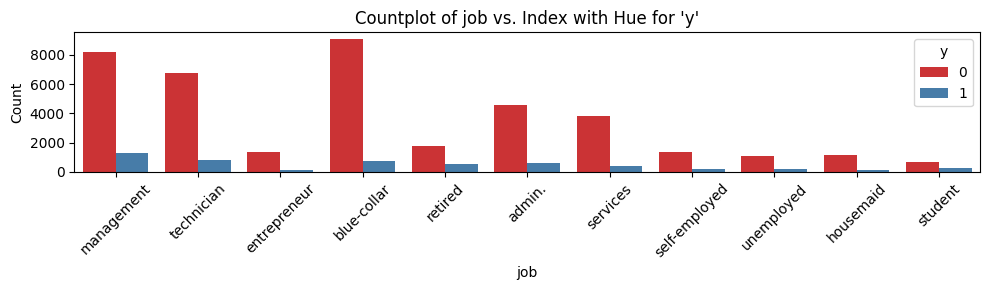

In [36]:
eda_part2(df_train, "job")

y             0     1
marital              
divorced   4579   621
married   24375  2744
single    10859  1906
---------------------------------------------


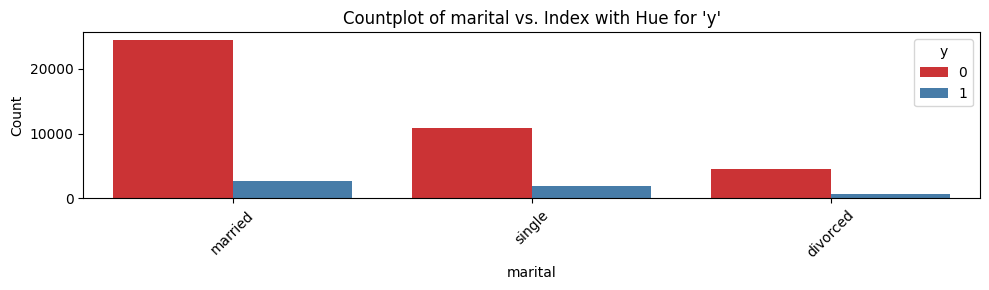

In [37]:
eda_part2(df_train,"marital")

y              0     1
education             
primary     1131   109
secondary  27734  3547
tertiary   10948  1615
---------------------------------------------


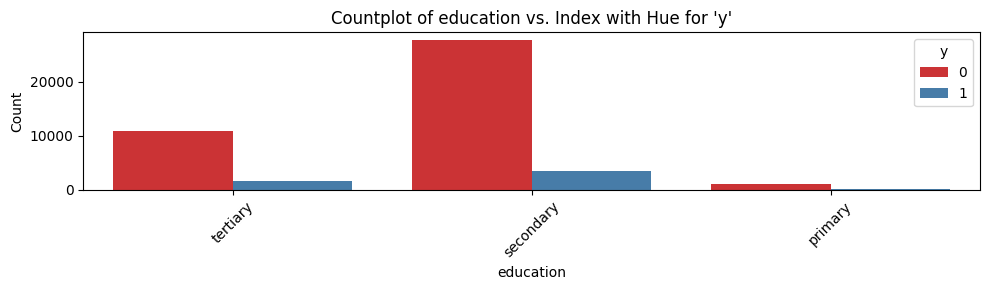

In [38]:
eda_part2(df_train,"education")

y            0     1
default             
0        39051  5219
1          762    52
---------------------------------------------


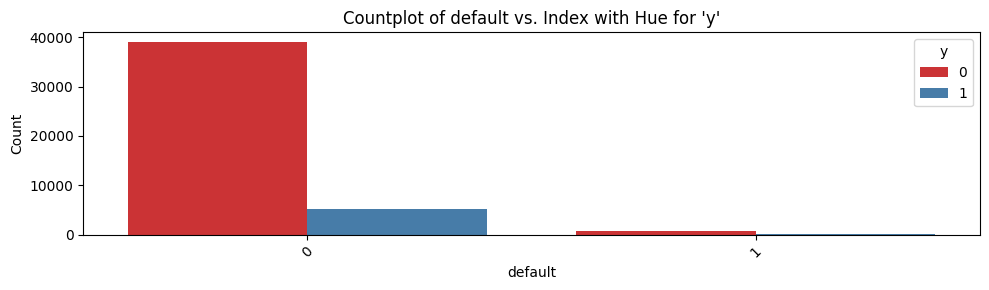

In [39]:
eda_part2(df_train, "default")

y            0     1
housing             
0        16626  3336
1        23187  1935
---------------------------------------------


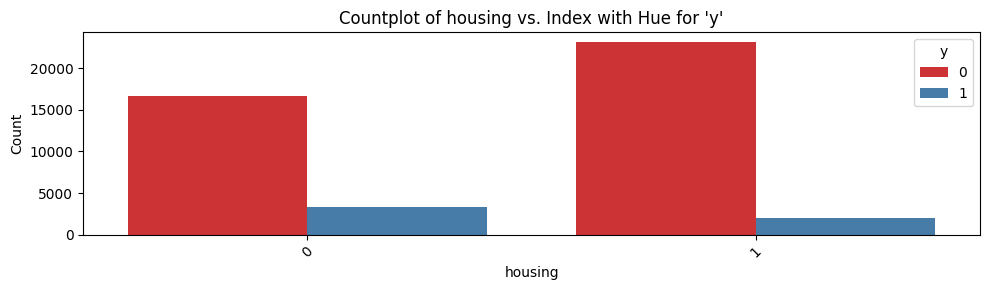

In [40]:
eda_part2(df_train, "housing")

y         0     1
loan             
0     33053  4787
1      6760   484
---------------------------------------------


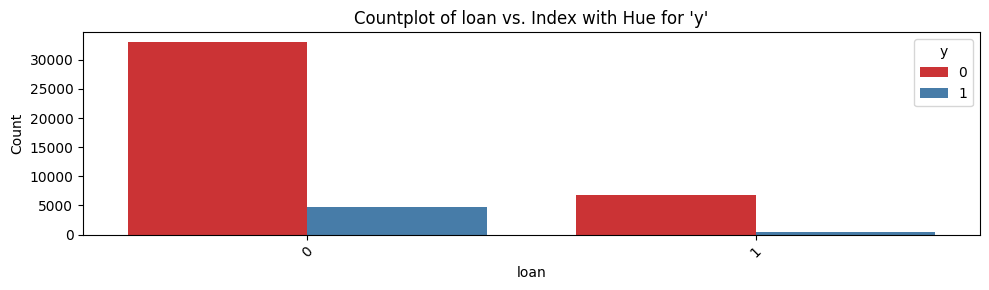

In [41]:
eda_part2(df_train, "loan")


y              0     1
contact               
cellular   24880  4356
telephone   2496   386
unknown    12437   529
---------------------------------------------


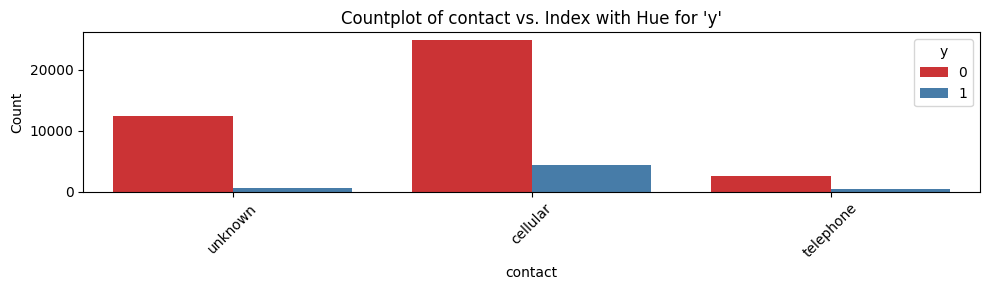

In [42]:
eda_part2(df_train, "contact")


    Cellular Contact: Approximately 14.82%
    Telephone Contact: Approximately 13.44%
    Unknown Contact: Approximately 4.11%
    The "cellular" contact method has the highest conversion rate, followed by "telephone," while "unknown" has the lowest conversion rate.

y          0    1
month            
apr     2355  572
aug     5533  684
dec      113  100
feb     2206  440
jan     1256  141
jul     6258  626
jun     4751  546
mar      229  248
may    12829  924
nov     3562  403
oct      414  319
sep      307  268
---------------------------------------------


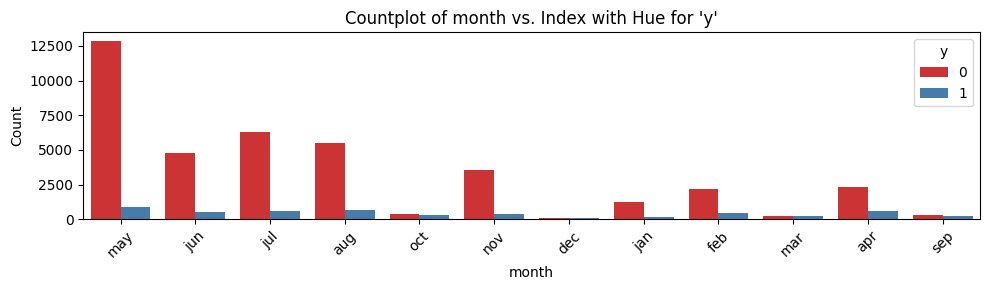

In [43]:
eda_part2(df_train,"month")

y            0     1
age_bin             
18-30     5882  1143
31-40    15863  1812
41-50    10171  1012
51-60     7219   805
61-70      412   283
71-80      211   173
81-90       53    38
91-95        2     5
---------------------------------------------


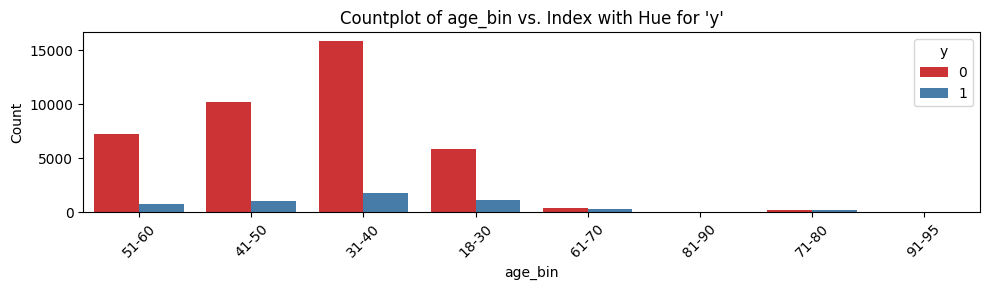

In [44]:
eda_part2(df_train, "age_bin")

y                0     1
duration_bin            
1/2           9031   195
2/3           8116   496
3/4           5466   584
4/5           3739   532
5/6           2501   409
6/7           1743   380
7/8           1189   300
8/9            838   283
<1            4628     9
>9            2562  2083
---------------------------------------------


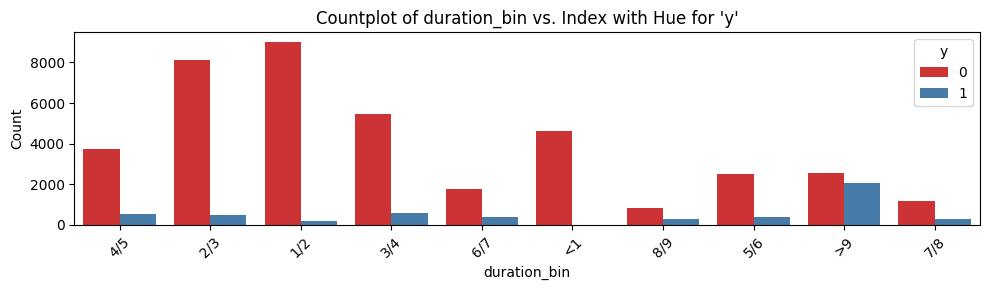

In [45]:
eda_part2(df_train, "duration_bin")

y                 0    1
balance_bin             
-2500 to 0     3548  209
0 to 100       7947  701
100 to 200     3076  365
1000 to 1500   3257  475
1500 to 2000   2012  367
200 to 300     2678  340
2000 to 3000   2386  491
300 to 400     2311  316
3000 to 4000   1415  299
400 to 500     1839  245
4000 to 5000    871  176
500 to 600     1669  210
5000 to 10000  1709  305
600 to 700     1384  194
700 to 800     1165  137
800 to 900      974  152
900 to 1000     873  155
< -2500           8    1
> 10000         691  133
---------------------------------------------


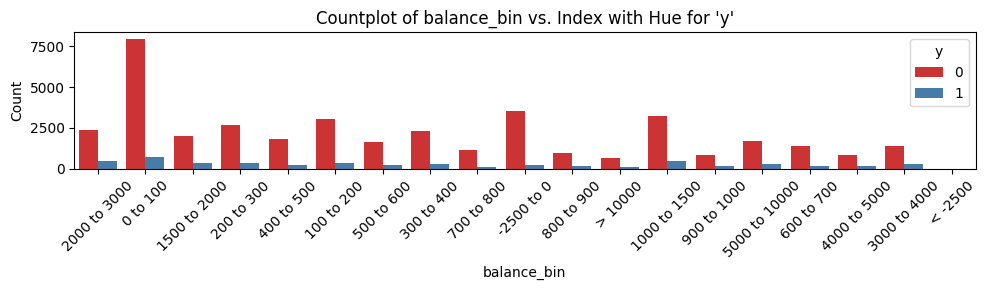

In [46]:
eda_part2(df_train,"balance_bin")

y                   0       1
campaign_bin                 
0-10          38669.0  5225.0
11-14           551.0    29.0
15-19           312.0    12.0
20-24           140.0     3.0
25-29            76.0     1.0
30-34            39.0     1.0
35-39            13.0     NaN
40-63            13.0     NaN
---------------------------------------------


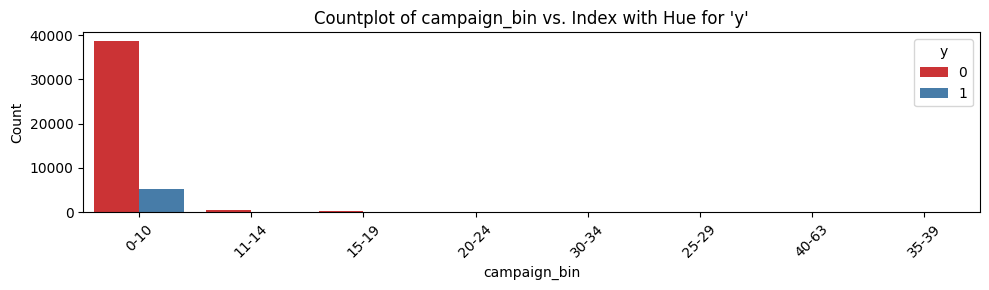

In [47]:
eda_part2(df_train,"campaign_bin")

y                         0     1
pdays_bin                        
 more than 550 times     43    29
0-50                    202    48
100-150                 711   184
150-200                1415   565
200-250                 429    68
250-300                 848   128
300-350                1052   111
350-400                 980   120
400-450                  20    41
450-500                  36    29
50-100                  591   562
500-550                  20    13
nc                    33466  3372
---------------------------------------------


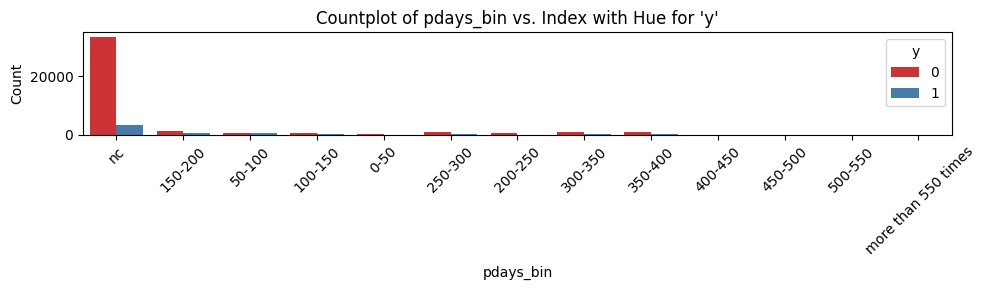

In [48]:
eda_part2(df_train,"pdays_bin")

y                   0       1
previous_bin                 
0-10          39573.0  5217.0
11-14           127.0    39.0
15-19            59.0     6.0
20-24            27.0     4.0
25-29            15.0     2.0
30-34             3.0     1.0
35-39             5.0     NaN
>= 40             4.0     2.0
---------------------------------------------


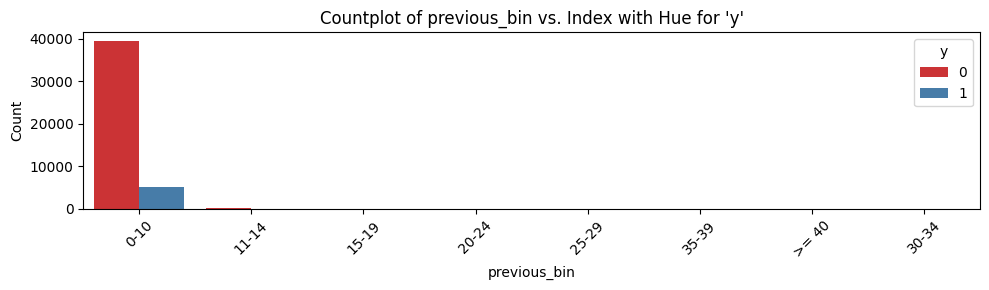

In [49]:
eda_part2(df_train,"previous_bin")

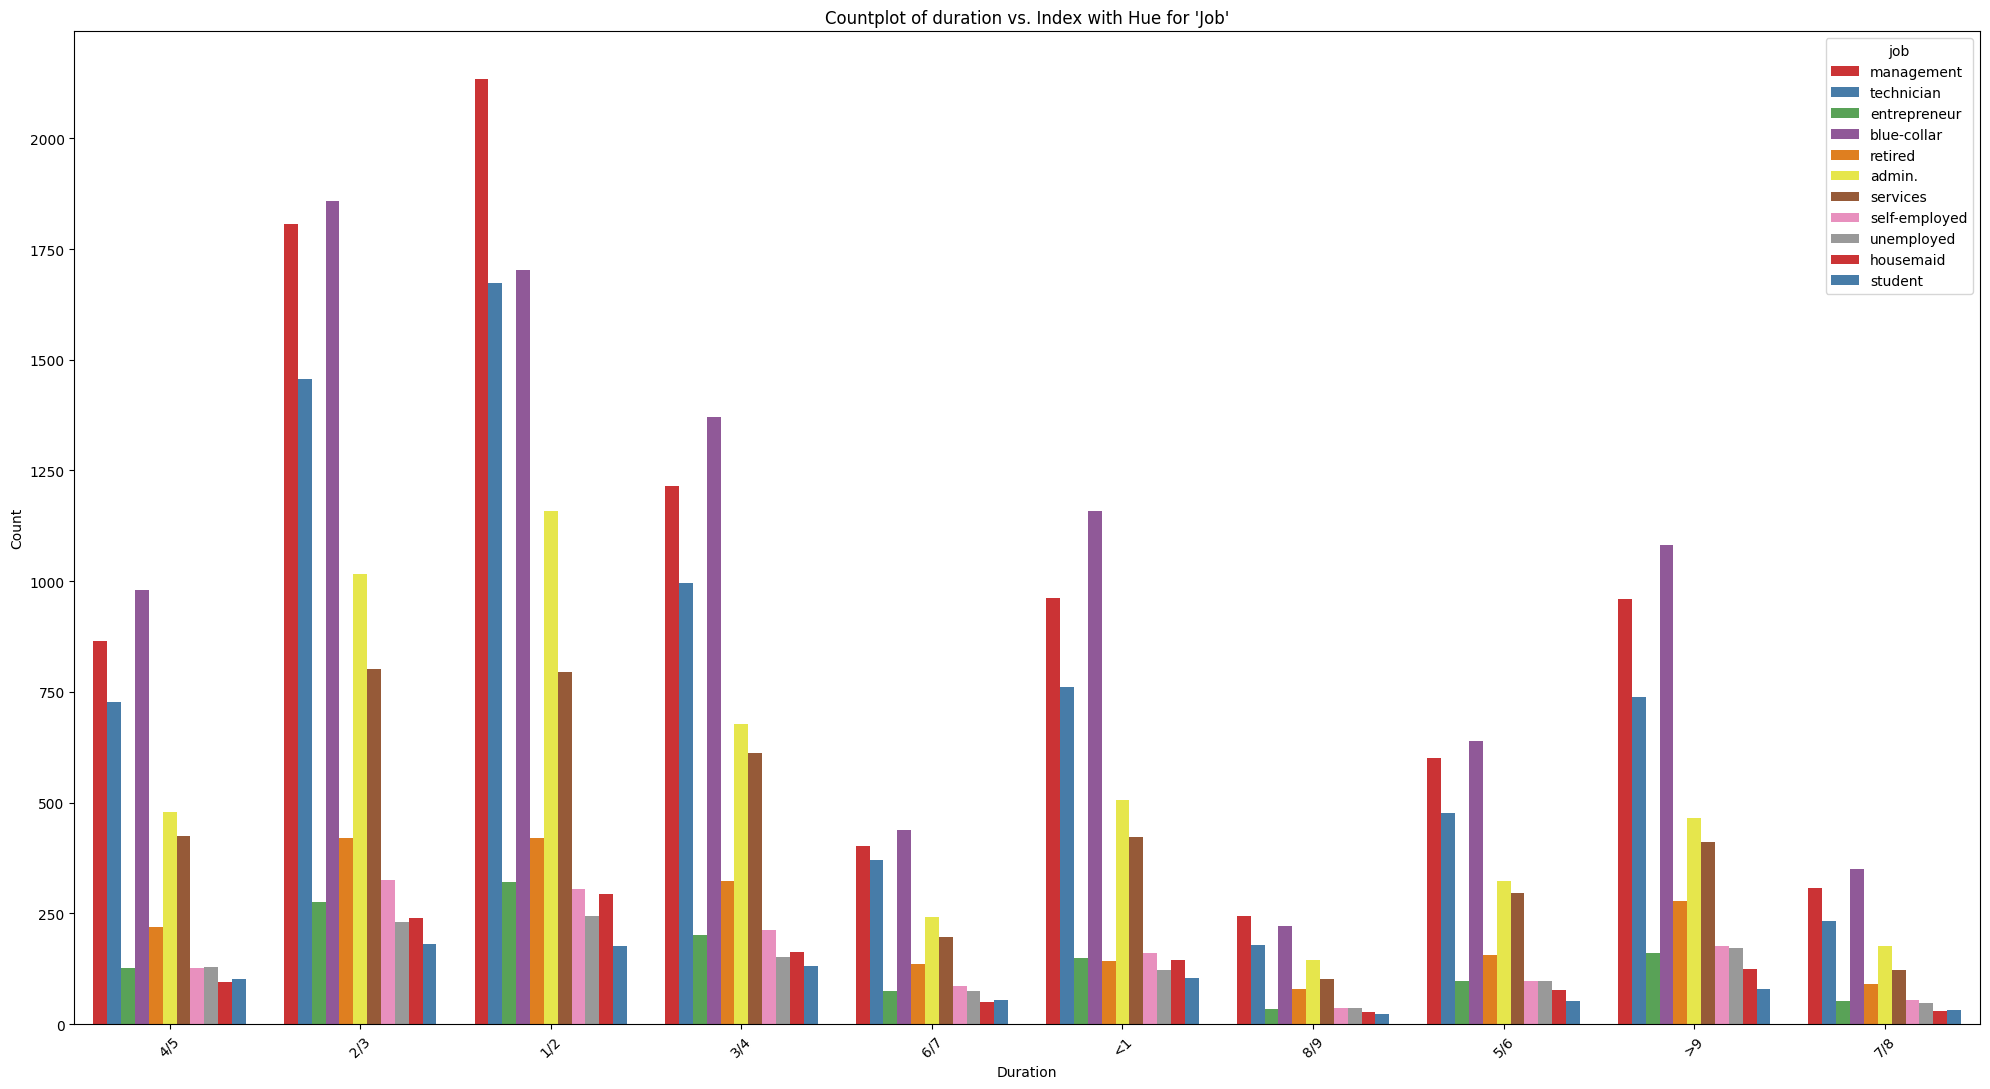

In [50]:
def who_talks_more(df):
    plt.figure(figsize=(20, 11))
    sns.countplot(data=df, x="duration_bin", hue="job", palette="Set1")
    plt.xlabel("Duration")
    plt.ylabel("Count")
    plt.title(f"Countplot of duration vs. Index with Hue for 'Job'")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

who_talks_more(df_train)

1.	The conversion rate of housemaids is the lowest, while management has the highest.

2.	Although we can observe from the data that married people have the highest conversion rate, we cannot be 100% certain due to our highly imbalanced dataset. If we calculate the ratio of conversions to non-conversions per category, we can still conclude that married people have the highest conversion rate.

- From now on, we will examine the ratio of conversions to non-conversions per category:

3.	The highest conversion rate is observed for the education level "primary," while "tertiary" has the lowest.

4.	Contact Method Breakdown:
•	"Cellular" contact method: Approximately 14.82%
•	"Telephone" contact method: Approximately 13.44%
•	"Unknown" contact method: Approximately 4.11%
•	The "cellular" contact method has the highest conversion rate, followed by "telephone," while "unknown" has the lowest conversion rate.
5.	The highest conversion rate is in March (51%), while the lowest is in May (6.7%).

6.	The highest conversion rate is observed in the older age group, and the lowest is in the "18-30" age group. Marketers may want to tailor their strategies and messaging to better target and engage specific age groups based on these conversion rates.

7.	The "Balance Bin 3000 to 4000" has the highest conversion rate, while the "Balance Bin -2500 to 0" has the lowest conversion rate.

8.	In the "50-100" pdays bin, there is a relatively high conversion rate of 48.73%. The lowest conversion rate is in the "more than 550 times" pdays bin, with a conversion rate of 40.32%.

### Modeling

In [51]:
def preprocess_data(df): # the prpose of this function is too encode and scale the data sent to it.
    
    columns_to_drop = ['index', 'has_both_loan', 'duration_bin', 'age_bin', 'balance_bin', 'campaign_bin', 'pdays_bin', 'previous_bin']
    df = df.drop(columns_to_drop, axis=1)
    
    y = df.pop("y")
    
    categorical_columns = df.select_dtypes(include=['object']).columns
    df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
    
    numerical_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns
    scaler = StandardScaler()
    df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])
    
    return df_encoded, y

In [52]:
X_processed, y_processed = preprocess_data(df_train)

In [53]:
knn = KNeighborsClassifier(n_neighbors=10)
log_reg = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier(max_depth=20)
ada = AdaBoostClassifier()
bag = BaggingClassifier()
voting = VotingClassifier(estimators=[
        ('decision_tree', dt),
        ('knn', knn), 
        ('dt', dt),
    ]) 

knn_params = {'classifier__n_neighbors': [3, 5, 7, 20, 30, 50, 100]}
log_reg_params = {'classifier__C': [0.01, 0.1, 1, 10, 100], 'classifier__class_weight': [None, 'balanced']}
rf_params = {'classifier__n_estimators': [50, 100, 150], 'classifier__max_depth': [None, 10, 20, 30, 50]}
ada_params = {'classifier__n_estimators': [25, 50, 75],'classifier__learning_rate': [0.01, 0.1, 0.5, 1.0]}
bag_params = {'classifier__n_estimators': [5, 10, 20],'classifier__max_samples': [0.5, 0.7, 1.0],'classifier__max_features': [0.5, 0.7, 1.0]}
voting_params = {'classifier__voting': ['hard', 'soft']}


In [54]:
def train_and_evaluate(X, y , classifiers):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    results = {}
    
    for name, clf in classifiers.items():
        start_time = time.time()
        
        pipeline = Pipeline(steps=[
            ('classifier', clf)
        ])
        
        pipeline.fit(X_train, y_train)
        
        y_pred = pipeline.predict(X_test)
        
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        
        end_time = time.time()
        elapsed_time = end_time - start_time
        
        results[name] = {
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Accuracy': accuracy,
            'Time (s)': elapsed_time
        }
    results_df = pd.DataFrame(results).T
    return results_df

In [55]:
classifiers_base = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log_reg
}

#train_and_evaluate(X_processed, y_processed , classifiers_base)

| Model                 | Precision Before Tuning | Recall Before Tuning | F1-Score Before Tuning | Accuracy Before Tuning | Time (s) Before Tuning |
|-----------------------|-------------------------|-----------------------|------------------------|------------------------|------------------------|
| K-Nearest Neighbors   | 0.632124                | 0.225300              | 0.332199               | 0.891206               | 2.927054               |
| Logistic Regression   | 0.625806                | 0.268698              | 0.375969               | 0.892869               | 0.648002               |


In [56]:
def tune_and_evaluate(X, y,classifiers , params_dict):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    tuned_results = {}
    
    for name, clf in classifiers.items():
        start_time = time.time()
        
        pipeline = Pipeline(steps=[
            ('classifier', clf)
        ])
        
        grid = GridSearchCV(pipeline, params_dict[name], cv=5)
        grid.fit(X_train, y_train)
        
        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)
        
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)        
        end_time = time.time()
        elapsed_time = end_time - start_time
        
        tuned_results[name] = {
            'Best Params': grid.best_params_,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Accuracy': accuracy,
            'Time (s)': elapsed_time
        }

    tuned_results_df = pd.DataFrame(tuned_results).T
    print(tuned_results_df)

In [57]:
params_dict_tunedBase = {
    'K-Nearest Neighbors': knn_params,
    'Logistic Regression': log_reg_params,
}
classifiers_tunedBase = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
}
#tune_and_evaluate(X_processed, y_processed, classifiers_tunedBase, params_dict_tunedBase)

| Model                 | Precision After Tuning | Recall After Tuning | F1-Score After Tuning | Accuracy After Tuning | Time (s) After Tuning |
|-----------------------|-------------------------|----------------------|-----------------------|-----------------------|-----------------------|
| K-Nearest Neighbors   | 0.664452                | 0.184672             | 0.289017              | 0.890873              | 54.182998             |
| Logistic Regression   | 0.625806                | 0.268698             | 0.375969              | 0.892869              | 15.66759              |


The provided output indicates the presence of the 'Accuracy Paradox,' as described in more detail here: link to Wikipedia article(https://en.wikipedia.org/wiki/Accuracy_paradox). To address this issue, we can explore the use of SMOTE

In [58]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_processed, y_processed)

In [59]:
#train_and_evaluate(X_train_resampled, y_train_resampled, classifiers_base)

| Model                 | Precision After SMOTE | Recall After SMOTE | F1-Score After SMOTE | Accuracy After SMOTE | Time (s) After SMOTE |
|-----------------------|------------------------|---------------------|-----------------------|-----------------------|-----------------------|
| K-Nearest Neighbors   | 0.875574               | 0.960222            | 0.915946              | 0.912093              | 5.695998              |
| Logistic Regression   | 0.848014               | 0.838620            | 0.843291              | 0.844531              | 1.003985              |


In [60]:
#tune_and_evaluate(X_train_resampled, y_train_resampled , classifiers_tunedBase , params_dict_tunedBase)

| Model                 | Precision After Tuning SMOTE | Recall After Tuning SMOTE | F1-Score After Tuning SMOTE | Accuracy After Tuning SMOTE | Time (s) After Tuning SMOTE |
|-----------------------|------------------------------|---------------------------|----------------------------|----------------------------|----------------------------|
| K-Nearest Neighbors   | 0.886304                     | 0.983258                  | 0.932267                   | 0.928733                   | 145.187035                  |
| Logistic Regression   | 0.848014                     | 0.838620                  | 0.843291                   | 0.844531                   | 37.68101                    |


In [61]:
classifiers_ensemble = {'Random Forest': rf,
    'AdaBoost': ada,
    'Bagging': bag,
    'Voting' : voting
    }
#train_and_evaluate(X_processed, y_processed , classifiers_ensemble)

| Algorithm       | Precision | Recall   | F1-Score | Accuracy | Time (s)   |
|-----------------|-----------|----------|----------|----------|------------|
| Random Forest   | 0.651633  | 0.386888 | 0.485516 | 0.901519 | 7.540031   |
| AdaBoost        | 0.618875  | 0.314866 | 0.417381 | 0.894422 | 2.422996   |
| Bagging         | 0.612805  | 0.371191 | 0.462335 | 0.896307 | 3.237968   |
| Voting          | 0.492798  | 0.442290 | 0.466180 | 0.878341 | 2.651033   |


In [62]:
params_dict_tunedensemble = {'Random Forest': rf_params,'AdaBoost': ada_params,'Bagging': bag_params,'Voting': voting_params}
classifiers_tunedensemble = {'Random Forest': rf,'AdaBoost': ada,'Bagging': bag, 'Voting' : voting}
#tune_and_evaluate(X_processed, y_processed, classifiers_tunedensemble, params_dict_tunedensemble)

| Algorithm       | Precision | Recall   | F1-Score | Accuracy | Time (s)   |
|-----------------|-----------|----------|----------|----------|------------|
| Random Forest   | 0.654147  | 0.385965 | 0.485482 | 0.901741 | 423.895764 |
| AdaBoost        | 0.622951  | 0.315789 | 0.419118 | 0.894865 | 115.654623 |
| Bagging         | 0.613699  | 0.413666 | 0.494208 | 0.898303 | 249.671756 |
| Voting          | 0.492370  | 0.446907 | 0.468538 | 0.878230 | 24.533031  |


In [63]:
#train_and_evaluate(X_train_resampled, y_train_resampled, classifiers_tunedensemble)

| Algorithm       | Precision | Recall   | F1-Score | Accuracy | Time (s)   |
|-----------------|-----------|----------|----------|----------|------------|
| Random Forest   | 0.920029  | 0.970292 | 0.944492 | 0.943112 | 20.147026  |
| AdaBoost        | 0.874685  | 0.872482 | 0.873582 | 0.874042 | 6.479966   |
| Bagging         | 0.916533  | 0.938570 | 0.927421 | 0.926724 | 8.818998   |
| Voting          | 0.894750  | 0.924597 | 0.909429 | 0.908138 | 8.608184   |


In [64]:
#tune_and_evaluate(X_train_resampled, y_train_resampled, classifiers_tunedensemble, params_dict_tunedensemble)

| Algorithm       | Precision | Recall   | F1-Score | Accuracy | Time (s)    |
|-----------------|-----------|----------|----------|----------|-------------|
| Random Forest   | 0.916152  | 0.971047 | 0.942801 | 0.941228 | 934.920437  |
| AdaBoost        | 0.884805  | 0.878902 | 0.881844 | 0.882519 | 293.410306  |
| Bagging         | 0.953717  | 0.928625 | 0.941004 | 0.941919 | 540.966044  |
| Voting          | 0.895669  | 0.929381 | 0.912214 | 0.910775 | 50.079301   |


Part 1: 

Data Preprocessing 

- I am creating a new column with consecutive numbers starting from 1 as an identifier for each row.
- I have converted these columns “'default', 'housing', 'loan', 'y'”, from binary categorical data into numerical form.
- Converted duration value from seconds to minutes.
- After observing an "unknown" value in four columns, this was my approach to handle it:
   - I used the job mode of each level to impute education.
   - I used the education mode of each level to impute jobs.
   - I am considering "unknown" as a third category. As mentioned earlier, they can be part of any other sort of communication, such as emails, advertisements, etc.
   - I am dropping the poutcome column. I tried one-hot encoding it, but it made no significant difference in the overall model performance. To reduce computational energy, I have decided to drop it.
- I have created a function which will encode and scale the data.
- Since we know that the data is highly imbalanced based on previous findings and the exploratory data analysis (EDA), I have created a function for SMOTE as well.

EDA 

- People with both housing and personal loans are more likely to experience payment delays and defaults.
- Individuals with both types of loans have a higher likelihood of loan default.
- Secondary education level individuals exhibit the highest default rates, while those with primary education levels default the least.
- The 'blue-collar' job category shows both high and low default rates compared to other job categories, suggesting variability in default risk.
- 'Student' job category has a notably low default rate, indicating their lower likelihood of repayment issues.
- Excessive client contacts before the campaign may decrease the chances of a positive outcome, suggesting the importance of contact management.
- Management has the highest conversion rate, while housemaids have the lowest.
- Although married individuals likely have the highest conversion rate, this conclusion is based on a highly imbalanced dataset.
- Primary education level exhibits the highest conversion rate, while tertiary education level has the lowest.
- Among contact methods, 'cellular' has the highest conversion rate, followed by 'telephone,' while 'unknown' has the lowest.
- March has the highest conversion rate, while May has the lowest.
- Older age groups tend to show higher conversion rates compared to the "18-30" age group, suggesting targeted marketing strategies.
- The "Balance Bin 3000-4000" has the highest conversion rate, whereas "Balance Bin -2500-0" has the lowest.
- In the "50-100" pdays bin, there's a relatively high conversion rate of 48.73%, whereas the "more than 550 times" pdays bin has the lowest conversion rate at 40.32%.

The EDA unveiled key insights, including higher default rates for individuals with both housing and personal loans, with secondary education levels having the highest default rates and 'student' job category showing notably low defaults. Excessive client contacts before campaigns may reduce positive outcomes. Factors like marital status, education level, contact method, balance, and the month of contact influenced conversion rates, with March being the highest and May the lowest. Age groups and previous contact frequency also played roles in conversion rates, and specific balance and pdays bins demonstrated distinct impact on outcomes.


Part 2:

Build the baseline model

- I have used logistic regression and KNN as part of my base model.
- Initially, I ran the training data on the base model, and then I tuned the base model.
  - However, this did not improve my recall and precision.
- Next, I ran my base model on SMOTE-processed data and then tuned the hyperparameters of the base model using the  SMOTE-processed data.
  - This approach yielded good results, but I would like to wait and check the ensemble models for comparison. Additionally, I observed that KNN appeared to be overfitting the data.

Part 3:

Ensemble Modelling

- Similar to the base model, I followed the same process for my detailed analysis of the model:
    - Running the model on the initial data.
    - Tuning and running the model on the initial data.
    - Running the model on SMOTE-processed data.
    - Tuning and running the model on SMOTE-processed data.

Part 4: 

Performance Comparison: Considering both the time required for the models to run, and the performance of the models on the data set.


| Scenario                                            | Algorithm        | Precision | Recall   | F1-Score | Accuracy | Time (s)    |
|----------------------------------------------------|------------------|-----------|----------|----------|----------|-------------|
| Running the model on the initial data              | K-Nearest Neighbors   | 0.632124  | 0.225300 | 0.332199 | 0.891206 | 2.927054    |
|                                                    | Logistic Regression   | 0.625806  | 0.268698 | 0.375969 | 0.892869 | 0.648002    |
| Tuning and running the model on the initial data   | K-Nearest Neighbors   | 0.664452  | 0.184672 | 0.289017 | 0.890873 | 54.182998   |
|                                                    | Logistic Regression   | 0.625806  | 0.268698 | 0.375969 | 0.892869 | 15.66759    |
| Running the model on SMOTE-processed data           | K-Nearest Neighbors   | 0.875574  | 0.960222 | 0.915946 | 0.912093 | 5.695998    |
|                                                    | Logistic Regression   | 0.848014  | 0.838620 | 0.843291 | 0.844531 | 1.003985    |
| Tuning and running the model on SMOTE-processed data| K-Nearest Neighbors   | 0.886304  | 0.983258 | 0.932267 | 0.928733 | 145.187035  |
|                                                    | Logistic Regression   | 0.848014  | 0.838620 | 0.843291 | 0.844531 | 37.68101    |


- From the table above, I can conclude that logistic regression with SMOTE data from the base models is the best-suited model for our use case. Please refer to the last and third-to-last rows in the table above. 

| Scenario                                            | Algorithm        | Precision | Recall   | F1-Score | Accuracy | Time (s)    |
|----------------------------------------------------|------------------|-----------|----------|----------|----------|-------------|
| Running the model on the initial data              | Random Forest    | 0.651633  | 0.386888 | 0.485516 | 0.901519 | 7.540031    |
|                                                    | AdaBoost         | 0.618875  | 0.314866 | 0.417381 | 0.894422 | 2.422996    |
|                                                    | Bagging          | 0.612805  | 0.371191 | 0.462335 | 0.896307 | 3.237968    |
|                                                    | Voting           | 0.492798  | 0.442290 | 0.466180 | 0.878341 | 2.651033    |
| Tuning and running the model on the initial data   | Random Forest    | 0.654147  | 0.385965 | 0.485482 | 0.901741 | 423.895764  |
|                                                    | AdaBoost         | 0.622951  | 0.315789 | 0.419118 | 0.894865 | 115.654623  |
|                                                    | Bagging          | 0.613699  | 0.413666 | 0.494208 | 0.898303 | 249.671756  |
|                                                    | Voting           | 0.492370  | 0.446907 | 0.468538 | 0.878230 | 24.533031   |
| Running the model on SMOTE-processed data           | Random Forest    | 0.920029  | 0.970292 | 0.944492 | 0.943112 | 20.147026   |
|                                                    | AdaBoost         | 0.874685  | 0.872482 | 0.873582 | 0.874042 | 6.479966    |
|                                                    | Bagging          | 0.916533  | 0.938570 | 0.927421 | 0.926724 | 8.818998    |
|                                                    | Voting           | 0.894750  | 0.924597 | 0.909429 | 0.908138 | 8.608184    |
| Tuning and running the model on SMOTE-processed data| Random Forest    | 0.916152  | 0.971047 | 0.942801 | 0.941228 | 934.920437  |
|                                                    | AdaBoost         | 0.884805  | 0.878902 | 0.881844 | 0.882519 | 293.410306  |
|                                                    | Bagging          | 0.953717  | 0.928625 | 0.941004 | 0.941919 | 540.966044  |
|                                                    | Voting           | 0.895669  | 0.929381 | 0.912214 | 0.910775 | 50.079301   |


- For ensemble models, I will conduct a comparison between bagging and voting. Both of these methods have provided promising results. The primary difference between them is that voting takes less time to run, while bagging exhibits slightly better precision and recall.

- After comparing the base model with the ensemble, I will choose the ensemble approach due to its superior performance. Despite a slight difference in the time required to run them, the ensemble models performed exceptionally well. It's worth noting that our voting ensemble includes logistic regression as one of the constituent models.

Part 5: 

Interpretation and Justification 

1. Why did the ensemble models perform the way they did?Beyond the hyperparameters, use your understanding of how the models work to explain why you think the models performed they way they did on the given data set. Was the result what you were expecting? Why or why not?

        The ensemble methods, on average, performed better than the baseline models primarily because of their unique characteristics. Ensemble methods harness the knowledge acquired from previous models to improve future predictions, often using techniques like averaging or boosting. While these methods may require more time to compute, they tend to yield superior results, especially when dealing with datasets like the one at hand.

        Among the ensemble methods, the Voting method emerged as the most effective. It combines the predictions of multiple base models by taking a majority or weighted vote, making it particularly adept at addressing class imbalances and delivering reliable predictions.

        Conversely, the Random Forest, while highly accurate, demands significant computational resources due to its reliance on a large number of decision trees. This computational intensity, along with an increased risk of overfitting, may limit its practical applicability.

        The overall results align with expectations. Recognizing the dataset's imbalance, it was reasonable to anticipate that ensemble methods would outperform the baseline models. However, the notable difference in computational time across models was unexpected. The Random Forest, despite its accuracy, may only be suitable for specialized scenarios due to its resource-intensive nature. In contrast, Voting, AdaBoost, and Bagging, while slightly less accurate, offer a more favorable balance between accuracy and computational efficiency, making them versatile choices for various practical applications.

        In summary, the consistent success of ensemble methods underscores their effectiveness in addressing data challenges like class imbalances. When selecting a model, it's essential to consider the trade-off between accuracy,recall, precesion and computational efficiency, with the Voting ensemble emerging as a well-rounded option for many real-world use cases.



2. If you had to pick one model to implement in business process, which would it be and why? Discuss the business implications.Consider not only performance metrics but also computational cost and interpretability.

        If I had to pick one model to implement in a business process, considering the analysis conducted, I would recommend the Voting ensemble model. The Voting model stands out due to its balanced combination of strong performance metrics, reasonable computational cost, and interpretability, making it a suitable choice for practical business applications. As I discussed in Part 4, the Voting classifier performs the best among all the ensemble models and includes logistic regression, which is the best-performing base model, built into it.


3. What decision criteria did you use to arrive at this conclusion? Precision-Recall trade-off? Computational cost? Others?

Precision and recall were pivotal factors, especially given the nature of our task, which involves classifying customer conversion or non-conversion. Precision measures the model's ability to correctly identify customers who are likely to convert, minimizing false positives. Recall, on the other hand, evaluates the model's capacity to capture all potential converters, minimizing false negatives. In this specific business context, achieving a balance between these two metrics is paramount. The Voting ensemble model, with its strong balance between precision and recall, ensures accurate identification of potential conversions without missing out on any valuable prospects. This characteristic makes precision and recall the ideal metrics to assess model performance and bolsters my choice of the Voting ensemble model for implementation in the business process. Computational cost played a pivotal role in my decision-making process as well, and Voting outperformed in that aspect too.